<a href="https://colab.research.google.com/github/willamesalmeida/machine_learning/blob/master/Identificando_qual_a_fruta_Deep_Learning_Aprendizagem_de_Maquina_na_pr%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# 1 Importando as Bibliotecas

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
import matplotlib.pyplot as plt
import os
 
from sklearn.metrics import accuracy_score
 
from keras import preprocessing
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop

# 2 Lendo as imagens

In [ ]:
#lendo imagem
img = cv2.imread("/content/drive/My Drive/Colab Notebooks/dataset/fruit_detection/test2/Apple Braeburn/1 (1).jpg")

In [ ]:
img.shape

(100, 100, 3)

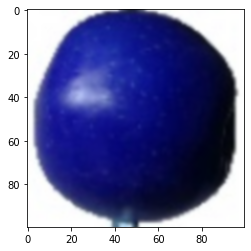

In [ ]:
#plotando imagem
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [ ]:
#transformando imagem em matriz de pixels
pixels = np.asarray(img)
pixels

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

# 3 Lendo todas as imagens

In [ ]:
input_dir ="/content/drive/My Drive/Colab Notebooks/dataset/fruit_detection/"

In [ ]:
#vendo como funciona esse listdir kkk 
print(os.listdir(input_dir+'train2'))

['Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit']


In [ ]:
#pegando nossas classes que são os nome das frutas e adicionando a um dicionario
contador = 0
classes = {}
for i in os.listdir(input_dir+'train2'):
  classes[i] = contador
  contador +=1

In [ ]:
#verificando se funcionou 
print(classes)

{'Cantaloupe': 0, 'Cherry': 1, 'Clementine': 2, 'Corn': 3, 'Apple Braeburn': 4, 'Apple Granny Smith': 5, 'Apricot': 6, 'Avocado': 7, 'Banana': 8, 'Blueberry': 9, 'Cactus fruit': 10}


In [ ]:

#tipo = train ou test
classes
def ler_dataset(tipo):
  X = []
  y = []
  qtd = 1000 if tipo == 'train2' else 200
  #para cada pasta
  for pasta in os.listdir(input_dir+tipo+'/'):
    print(pasta)
    #para cada imagem na pasta
    for img_file in os.listdir(input_dir+tipo+'/'+pasta+'/')[:qtd]:
      #leia a imagem
      img = cv2.imread(input_dir+tipo+'/'+pasta+'/'+img_file)
      #transforme imagem em array de pixels e salve na lista de imagens
      X.append(img)
      #guarde a classificação da imagem
      y.append(classes[pasta])
  X = np.asarray(X)
  y = np.asarray(y)
  return X,y

In [ ]:
X_treino,y_treino = ler_dataset('train2')

Cantaloupe
Cherry
Clementine
Corn
Apple Braeburn
Apple Granny Smith
Apricot
Avocado
Banana
Blueberry
Cactus fruit


In [ ]:
X_treino.shape

(5269, 100, 100, 3)

In [ ]:
y_treino.shape

(5269,)

In [ ]:
X_teste,y_teste = ler_dataset('test2')

Cactus fruit
Apple Braeburn
Cantaloupe
Apricot
Cherry
Avocado
Clementine
Apple Granny Smith
Blueberry
Banana
Corn


In [ ]:
X_teste.shape

(2200, 100, 100, 3)

In [ ]:

y_teste.shape

(2200,)

In [ ]:
#transformando labels de numérico para categórico
y_treino = to_categorical(y_treino, num_classes = 11)
y_teste = to_categorical(y_teste, num_classes = 11)

# 4 Reescala dos dados 

In [ ]:
X_treino = X_treino/255
X_teste = X_teste/255

# 5 Definindo modelo 

In [ ]:
#definição do modelo
model = Sequential()
 
# 2 camadas de convolução de 32 filtros + Max pooling [2,2]
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (100,100,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
# 2 camadas de convolução de 64 filtros + Max pooling [2,2]
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
 
# 2 camadas de convolução de 128 filtros + Max pooling [2,2]
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
 
#  2 camadas fully conected 
model.add(Flatten())#converte os mapas de ativação finais para um vetor de 1 dimensão
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(11, activation = "softmax"))

In [ ]:
# Definindo o algoritmo otmizador
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [ ]:
# Compilando o modelo
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Descrição do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      25632     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 64)        3

In [ ]:
# treinamento do modelo
model.fit(X_treino, y_treino, epochs=1, verbose = 1)

165/165 [==============================] - 850s 5s/step - loss: 2.3317 - accuracy: 0.4158


# 5. Avaliando Modelo

In [ ]:
model.evaluate(X_teste,y_teste)

69/69 [==============================] - 80s 1s/step - loss: 0.6015 - accuracy: 0.7818


[0.6015303134918213, 0.7818182110786438]